# Model Optimization Attempts

## Attempt 1: further consolidation of the features, addition of another hidden layer, bump up the node count
###  Preprocessing the Data for a Neural Network

In [454]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 

In [340]:
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [341]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns=['EIN', 'NAME'],axis=1)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [342]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [343]:
# Iterate over columns can get the value_count()
for column in application_df:
    print(application_df[column].value_counts())

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
1    34294
0        5
Name: STATUS, dtype: int64
0                24388
25000

## First bin the ASK_AMT column

In [344]:
# Establish the bins.
# ASK_AMT_bins = [0, 5000, 25000, 50000, 100000, 500000, 100000000]
#group_names = ["A", "B", "C", "D", "E", 'F']

ASK_AMT_bins = [0, 5000, 500000, 100000000]
group_names = ["A", "B", "C"]
# Categorize spending based on the bins.
application_df["Amt_Binned"] = pd.cut(application_df.ASK_AMT, ASK_AMT_bins, labels=group_names)

application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,Amt_Binned
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,A
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,B
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,A
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,B
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,B


In [345]:
#Drop the ASK_AMT column and make sure we have what we want going forward
application_df = application_df.drop('ASK_AMT', axis=1)
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'IS_SUCCESSFUL', 'Amt_Binned'],
      dtype='object')

## Consolidate the application types

In [346]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.value_counts('APPLICATION_TYPE')
app_type_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
dtype: int64

<AxesSubplot:ylabel='Density'>

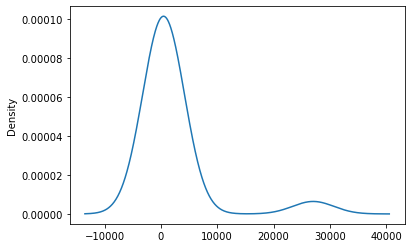

In [347]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [348]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_count[app_type_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

## Consolidate the Classification column

In [349]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.value_counts('CLASSIFICATION')
classification_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C2380        1
C2500        1
C2561        1
C8210        1
Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

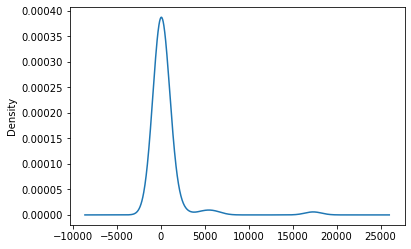

In [350]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [351]:
# Determine which values to replace if counts are less than 1800
replace_class = list(classification_counts[classification_counts < 500].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

## Consolidate the AFFILIATION column

In [352]:
aff_counts = application_df.value_counts('AFFILIATION')
aff_counts

AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
dtype: int64

In [353]:
# Determine which values to replace if counts are less than 1000
replace_aff = list(aff_counts[aff_counts < 1000].index)
# Replace in dataframe
for cls in replace_aff:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [354]:
# Iterate over columns can get the value_count()
for column in application_df:
    print(application_df[column].value_counts())

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64
Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
1    34294
0        5
Name: STATUS, dtype: int64
0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64
N    34272
Y       27
Name

In [355]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'IS_SUCCESSFUL', 'Amt_Binned'],
      dtype='object')

In [356]:
final_df = application_df.drop(columns=['SPECIAL_CONSIDERATIONS', 'INCOME_AMT', 'STATUS'])
final_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,IS_SUCCESSFUL,Amt_Binned
0,T10,Independent,C1000,ProductDev,Association,1,A
1,T3,Independent,C2000,Preservation,Co-operative,1,B
2,T5,CompanySponsored,C3000,ProductDev,Association,0,A
3,T3,CompanySponsored,C2000,Preservation,Trust,1,B
4,T3,Independent,C1000,Heathcare,Trust,1,B
...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,A
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,A
34296,T3,CompanySponsored,C2000,Preservation,Association,0,A
34297,T5,Independent,C3000,ProductDev,Association,1,A


In [357]:
# Iterate over columns can get the value_count()
for column in final_df:
    print(final_df[column].value_counts())

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64
Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64
A    25398
B     6674
C     2126
Name: Amt_Binned, dtype: int64


In [358]:
# Generate our categorical variable lists
final_cat = list(final_df.select_dtypes(include=['object', 'category']))
final_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'Amt_Binned']

In [359]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(final_df[final_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(final_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,Amt_Binned_A,Amt_Binned_B,Amt_Binned_C,Amt_Binned_nan
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [360]:
# Merge one-hot encoded features and drop the originals
model_data_df = final_df.merge(encode_df,left_index=True, right_index=True)

In [361]:
model_data_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,IS_SUCCESSFUL,Amt_Binned,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,Amt_Binned_A,Amt_Binned_B,Amt_Binned_C,Amt_Binned_nan
0,T10,Independent,C1000,ProductDev,Association,1,A,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,T3,Independent,C2000,Preservation,Co-operative,1,B,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,T5,CompanySponsored,C3000,ProductDev,Association,0,A,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,B,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,T3,Independent,C1000,Heathcare,Trust,1,B,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,A,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,A,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,A,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34297,T5,Independent,C3000,ProductDev,Association,1,A,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [433]:
model_data_df = model_data_df.drop(final_cat,1)
model_data_df.head()

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\3568835425.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  model_data_df = model_data_df.drop(final_cat,1)


KeyError: "['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'] not found in axis"

In [363]:
# Split our preprocessed data into our features and target arrays
y = model_data_df.IS_SUCCESSFUL.values
X = model_data_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\1781828065.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = model_data_df.drop(["IS_SUCCESSFUL"],1).values


In [364]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [365]:
#Check the balance of the training target
from collections import Counter
Counter(y_train)

Counter({0: 12001, 1: 13723})

### Compile, Train and Evaluate the Model

In [366]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 66
hidden_nodes_layer2 = 33
hidden_nodes_layer3 = 10

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Third hidden layer
nn_new.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3, 
    activation="relu"
))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 96)                3168      
                                                                 
 dense_43 (Dense)            (None, 80)                7760      
                                                                 
 dense_44 (Dense)            (None, 40)                3240      
                                                                 
 dense_45 (Dense)            (None, 1)                 41        
                                                                 
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


In [367]:
# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [368]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_new/",exist_ok=True)
checkpoint_path = "checkpoints_new/weights.{epoch:02d}.hdf5"

In [369]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5649 - accuracy: 0.7222
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5537 - accuracy: 0.7263
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5511 - accuracy: 0.7297
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.7290
Epoch 5/100
790/804 [============================>.] - ETA: 0s - loss: 0.5497 - accuracy: 0.7293
Epoch 5: saving model to checkpoints_new\weights.05.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5496 - accuracy: 0.7294
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5485 - accuracy: 0.7321
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5471 - accuracy: 0.7317
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5471 - accuracy: 0.7309
Epoch 9/100
804/804 [=============================

804/804 [==============================] - 1s 2ms/step - loss: 0.5389 - accuracy: 0.7357
Epoch 64/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5383 - accuracy: 0.7362
Epoch 65/100
793/804 [============================>.] - ETA: 0s - loss: 0.5388 - accuracy: 0.7362
Epoch 65: saving model to checkpoints_new\weights.65.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5387 - accuracy: 0.7364
Epoch 66/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5383 - accuracy: 0.7360
Epoch 67/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.7357
Epoch 68/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5389 - accuracy: 0.7361
Epoch 69/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5383 - accuracy: 0.7362
Epoch 70/100
800/804 [============================>.] - ETA: 0s - loss: 0.5376 - accuracy: 0.7360
Epoch 70: saving model to checkpoints_new\weights.70.hdf5


In [370]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5613 - accuracy: 0.7287 - 452ms/epoch - 2ms/step
Loss: 0.5613203048706055, Accuracy: 0.7287463545799255


In [409]:
# Export the model to HDF5 file
nn_new.save("trained_application_new_v1.h5")

<AxesSubplot:>

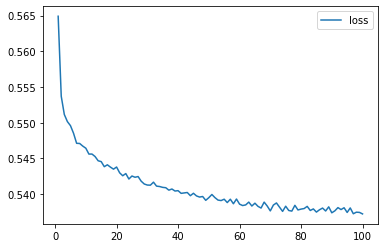

In [372]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

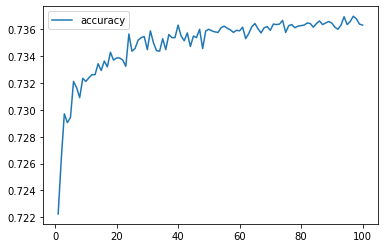

In [373]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Attempt 2: Give the model all of the data

In [374]:
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [375]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns=['EIN', 'NAME'],axis=1)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [376]:
# Generate our categorical variable lists
final_cat = list(application_df.select_dtypes(include=['object', 'category']))
final_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [377]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[final_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(final_cat)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [378]:
# Merge one-hot encoded features and drop the originals
model_data_df = application_df.merge(encode_df,left_index=True, right_index=True)
model_data_df = model_data_df.drop(final_cat,1)
model_data_df.head()

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\4135013742.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  model_data_df = model_data_df.drop(final_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [379]:
# Split our preprocessed data into our features and target arrays
y = model_data_df.IS_SUCCESSFUL.values
X = model_data_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\1781828065.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = model_data_df.drop(["IS_SUCCESSFUL"],1).values


In [380]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [381]:
#Check the balance of the training target
from collections import Counter
Counter(y_train)

Counter({0: 12001, 1: 13723})

### Compile, Train and Evaluate the Model

In [382]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 3*number_input_features
hidden_nodes_layer2 = 150
hidden_nodes_layer3 = 50

nn_new_v2 = tf.keras.models.Sequential()

# First hidden layer
nn_new_v2.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new_v2.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Third hidden layer
nn_new_v2.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3, 
    activation="relu"
))

# Output layer
nn_new_v2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new_v2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 348)               40716     
                                                                 
 dense_47 (Dense)            (None, 150)               52350     
                                                                 
 dense_48 (Dense)            (None, 50)                7550      
                                                                 
 dense_49 (Dense)            (None, 1)                 51        
                                                                 
Total params: 100,667
Trainable params: 100,667
Non-trainable params: 0
_________________________________________________________________


In [383]:
# Compile the model
nn_new_v2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [384]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_new_v2/",exist_ok=True)
checkpoint_path = "checkpoints_new_v2/weights.{epoch:02d}.hdf5"

In [385]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new_v2.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5692 - accuracy: 0.7238
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5532 - accuracy: 0.7311
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5496 - accuracy: 0.7311
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5474 - accuracy: 0.7318
Epoch 5/100
801/804 [============================>.] - ETA: 0s - loss: 0.5463 - accuracy: 0.7321
Epoch 5: saving model to checkpoints_new_v2\weights.05.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5464 - accuracy: 0.7322
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5441 - accuracy: 0.7345
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5437 - accuracy: 0.7346
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5423 - accuracy: 0.7352
Epoch 9/100
804/804 [==========================

Epoch 63/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5294 - accuracy: 0.7426
Epoch 64/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5288 - accuracy: 0.7423
Epoch 65/100
802/804 [============================>.] - ETA: 0s - loss: 0.5275 - accuracy: 0.7419
Epoch 65: saving model to checkpoints_new_v2\weights.65.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5274 - accuracy: 0.7420
Epoch 66/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5297 - accuracy: 0.7428
Epoch 67/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5274 - accuracy: 0.7423
Epoch 68/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5275 - accuracy: 0.7428
Epoch 69/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5280 - accuracy: 0.7431
Epoch 70/100
786/804 [============================>.] - ETA: 0s - loss: 0.5291 - accuracy: 0.7416
Epoch 70: saving model to checkpoints_new_

In [386]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new_v2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5930 - accuracy: 0.7301 - 532ms/epoch - 2ms/step
Loss: 0.593035101890564, Accuracy: 0.7301457524299622


In [408]:
# Export the model to HDF5 file
nn_new_v2.save("trained_application_new_v2.h5")

<AxesSubplot:>

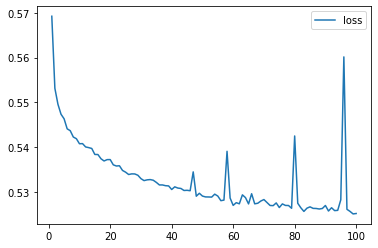

In [388]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

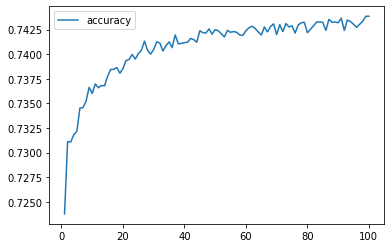

In [391]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Attempt 3: give the model all the data but tweak model parameters

In [392]:
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [393]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns=['EIN', 'NAME'],axis=1)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [394]:
# Generate our categorical variable lists
final_cat = list(application_df.select_dtypes(include=['object', 'category']))
final_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [395]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[final_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(final_cat)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [396]:
# Merge one-hot encoded features and drop the originals
model_data_df = application_df.merge(encode_df,left_index=True, right_index=True)
model_data_df = model_data_df.drop(final_cat,1)
model_data_df.head()

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\4135013742.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  model_data_df = model_data_df.drop(final_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [397]:
# Split our preprocessed data into our features and target arrays
y = model_data_df.IS_SUCCESSFUL.values
X = model_data_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\1781828065.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = model_data_df.drop(["IS_SUCCESSFUL"],1).values


In [398]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [399]:
#Check the balance of the training target
from collections import Counter
Counter(y_train)

Counter({0: 12001, 1: 13723})

### Compile, Train and Evaluate the Model

In [425]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 10

nn_new_v3 = tf.keras.models.Sequential()

# First hidden layer
nn_new_v3.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new_v3.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Output layer
nn_new_v3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new_v3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 50)                5850      
                                                                 
 dense_63 (Dense)            (None, 10)                510       
                                                                 
 dense_64 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,371
Trainable params: 6,371
Non-trainable params: 0
_________________________________________________________________


In [426]:
# Compile the model
nn_new_v3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [427]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_new_v3/",exist_ok=True)
checkpoint_path = "checkpoints_new_v3/weights.{epoch:02d}.hdf5"

In [428]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new_v3.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5774 - accuracy: 0.5335
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5527 - accuracy: 0.5335
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5490 - accuracy: 0.5335
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5463 - accuracy: 0.5335
Epoch 5/100
795/804 [============================>.] - ETA: 0s - loss: 0.5456 - accuracy: 0.5330
Epoch 5: saving model to checkpoints_new_v3\weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5452 - accuracy: 0.5335
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5451 - accuracy: 0.5335
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5434 - accuracy: 0.5335
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5429 - accuracy: 0.5335
Epoch 9/100
362/804 [============>.............

KeyboardInterrupt: 

In [414]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new_v3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5924 - accuracy: 0.7289 - 434ms/epoch - 2ms/step
Loss: 0.5923584699630737, Accuracy: 0.728863000869751


In [415]:
# Export the model to HDF5 file
nn_new_v3.save("trained_application_new_v3.h5")

<AxesSubplot:>

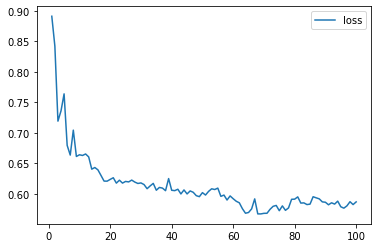

In [416]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

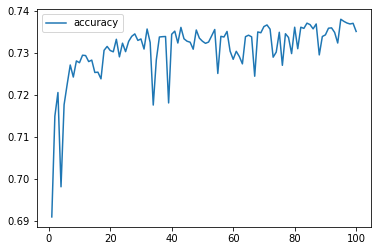

In [417]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Atempt 4

In [429]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 150
hidden_nodes_layer2 = 75
hidden_nodes_layer3 = 50
hidden_nodes_layer4 = 25

nn_new_v4 = tf.keras.models.Sequential()

# First hidden layer
nn_new_v4.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new_v4.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Second hidden layer
nn_new_v4.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Second hidden layer
nn_new_v4.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Output layer
nn_new_v4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new_v4.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 150)               17550     
                                                                 
 dense_66 (Dense)            (None, 75)                11325     
                                                                 
 dense_67 (Dense)            (None, 75)                5700      
                                                                 
 dense_68 (Dense)            (None, 75)                5700      
                                                                 
 dense_69 (Dense)            (None, 1)                 76        
                                                                 
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________


In [430]:
# Compile the model
nn_new_v4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [431]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_new_v4/",exist_ok=True)
checkpoint_path = "checkpoints_new_v4/weights.{epoch:02d}.hdf5"

In [432]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new_v4.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5672 - accuracy: 0.7215
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5520 - accuracy: 0.7302
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5484 - accuracy: 0.7332
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5470 - accuracy: 0.7337
Epoch 5/100
792/804 [============================>.] - ETA: 0s - loss: 0.5453 - accuracy: 0.7342
Epoch 5: saving model to checkpoints_new_v4\weights.05.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5452 - accuracy: 0.7344
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5446 - accuracy: 0.7349
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5434 - accuracy: 0.7357
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5423 - accuracy: 0.7358
Epoch 9/100
804/804 [==========================

Epoch 63/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5286 - accuracy: 0.7421
Epoch 64/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5279 - accuracy: 0.7425
Epoch 65/100
802/804 [============================>.] - ETA: 0s - loss: 0.5274 - accuracy: 0.7429
Epoch 65: saving model to checkpoints_new_v4\weights.65.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5274 - accuracy: 0.7429
Epoch 66/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5269 - accuracy: 0.7422
Epoch 67/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5271 - accuracy: 0.7428
Epoch 68/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5280 - accuracy: 0.7425
Epoch 69/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5289 - accuracy: 0.7420
Epoch 70/100
799/804 [============================>.] - ETA: 0s - loss: 0.5278 - accuracy: 0.7426
Epoch 70: saving model to checkpoints_new_

In [434]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new_v4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6022 - accuracy: 0.7289 - 498ms/epoch - 2ms/step
Loss: 0.6021677255630493, Accuracy: 0.728863000869751


In [435]:
# Export the model to HDF5 file
nn_new_v4.save("trained_application_new_v4.h5")

<AxesSubplot:>

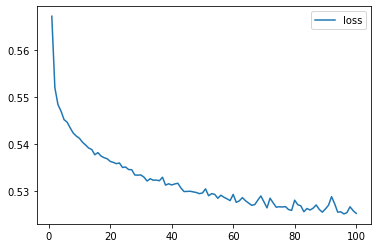

In [436]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

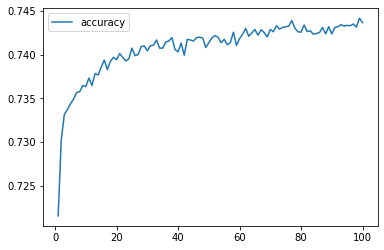

In [437]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Attempt 5

In [438]:
# Split our preprocessed data into our features and target arrays
y = model_data_df.IS_SUCCESSFUL.values
X = model_data_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\jonat\AppData\Local\Temp\ipykernel_5348\1781828065.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = model_data_df.drop(["IS_SUCCESSFUL"],1).values


In [440]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 3*number_input_features
hidden_nodes_layer2 = np.floor(0.5*hidden_nodes_layer1)
hidden_nodes_layer3 = np.floor(0.5*hidden_nodes_layer1)
hidden_nodes_layer4 = np.floor(0.5*hidden_nodes_layer2)

nn_new_v5 = tf.keras.models.Sequential()

# First hidden layer
nn_new_v5.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new_v5.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Second hidden layer
nn_new_v5.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Second hidden layer
nn_new_v5.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Output layer
nn_new_v5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new_v5.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 348)               40716     
                                                                 
 dense_76 (Dense)            (None, 174)               60726     
                                                                 
 dense_77 (Dense)            (None, 174)               30450     
                                                                 
 dense_78 (Dense)            (None, 174)               30450     
                                                                 
 dense_79 (Dense)            (None, 1)                 175       
                                                                 
Total params: 162,517
Trainable params: 162,517
Non-trainable params: 0
_________________________________________________________________


In [447]:
# Compile the model
nn_new_v5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [448]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_new_v5/",exist_ok=True)
checkpoint_path = "checkpoints_new_v5/weights.{epoch:02d}.hdf5"

In [449]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new_v5.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5687 - accuracy: 0.7215
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5547 - accuracy: 0.7287
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5500 - accuracy: 0.7320
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5490 - accuracy: 0.7323
Epoch 5/100
794/804 [============================>.] - ETA: 0s - loss: 0.5471 - accuracy: 0.7341
Epoch 5: saving model to checkpoints_new_v5\weights.05.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5470 - accuracy: 0.7340
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5455 - accuracy: 0.7339
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5450 - accuracy: 0.7352
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5440 - accuracy: 0.7343
Epoch 9/100
804/804 [==========================

Epoch 63/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5291 - accuracy: 0.7416
Epoch 64/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5281 - accuracy: 0.7426
Epoch 65/100
793/804 [============================>.] - ETA: 0s - loss: 0.5285 - accuracy: 0.7419
Epoch 65: saving model to checkpoints_new_v5\weights.65.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5280 - accuracy: 0.7421
Epoch 66/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5338 - accuracy: 0.7423
Epoch 67/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5296 - accuracy: 0.7424
Epoch 68/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5285 - accuracy: 0.7420
Epoch 69/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5278 - accuracy: 0.7423
Epoch 70/100
803/804 [============================>.] - ETA: 0s - loss: 0.5275 - accuracy: 0.7428
Epoch 70: saving model to checkpoints_new_

In [450]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new_v5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6186 - accuracy: 0.7291 - 622ms/epoch - 2ms/step
Loss: 0.6185526847839355, Accuracy: 0.7290962338447571


In [451]:
# Export the model to HDF5 file
nn_new_v5.save("trained_application_new_v5.h5")

<AxesSubplot:>

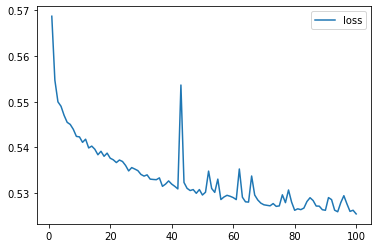

In [452]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

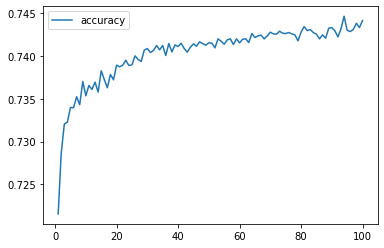

In [453]:
# Plot the accuracy
history_df.plot(y="accuracy")